In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chisquare, chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.formula.api as smf
import researchpy as rp

In [188]:
train_data = pd.read_csv("train.csv")

In [189]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [190]:
train_data.columns = ["id", "survived", "p_class", "name", "sex", "age", "sibling_spouse", "parch", "ticket", "fare", "cabin", "embarked"]


train_data["num_relative"] = train_data["sibling_spouse"] + train_data["parch"]
surived = {1 : "alive", 0 : "dead"}
embarked = {"S" : "southampton", "C" : "cherbourg", "Q" : "queenstown"}
p_class = {1 : "first_class", 2 : "second_class", 3 : "third_class"}

train_data["survived_cat"] = train_data["survived"].map(surived)
train_data["embarked_cat"] = train_data["embarked"].map(embarked)
train_data["p_class_cat"] = train_data["ticket"].map(p_class)


In [191]:
def relative_num(x):
    if x > 0:
        return "not alone"
    else:
        return "alone"
    
    
train_data["num_relative_cat"] = train_data["num_relative"].apply(relative_num)

First, we need to take a count of males and females in the ship.

In [192]:
train_data["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

Next, we need to know the number of survivals grouped by sex

In [193]:
train_data.groupby("sex")["survived"].sum()

sex
female    233
male      109
Name: survived, dtype: int64

Let us check the percentage of women and men that survived

In [194]:
women = train_data.loc[train_data.sex == "female"]["survived"]
men = train_data.loc[train_data.sex == "male"]["survived"]

women_percent = (sum(women) / len(women)) * 100
men_percent = (sum(men)/ len(men)) * 100

print("percentage of women that survived is : ", round(women_percent, 2))
print("percentage of men that survived is: ", round(men_percent, 2))

percentage of women that survived is :  74.2
percentage of men that survived is:  18.89


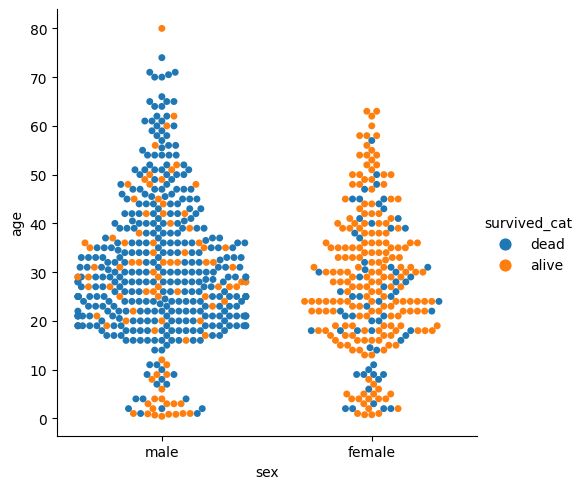

In [195]:
sns.catplot(data=train_data, x= "sex", y= "age", kind = "swarm", hue = "survived_cat")

We discovered that more women survived the crash than men. what then could have been the reason? could it have been influenced by
1. what class they boarded
2. number of family members with them
3. Age
4. The point of origin

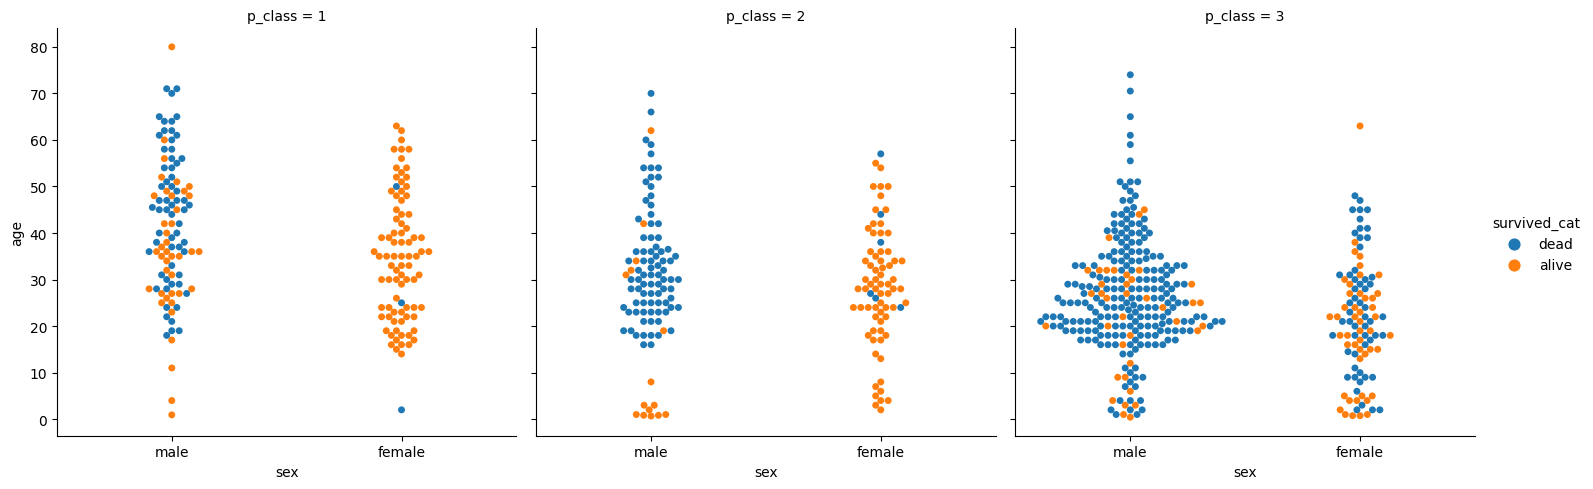

In [196]:
sns.catplot(data=train_data, kind = "swarm", x = "sex", y = "age", col= "p_class", hue = "survived_cat")
# where p_class 1 is first_class, p_class 2 is second_class and p_class 3 is third_class

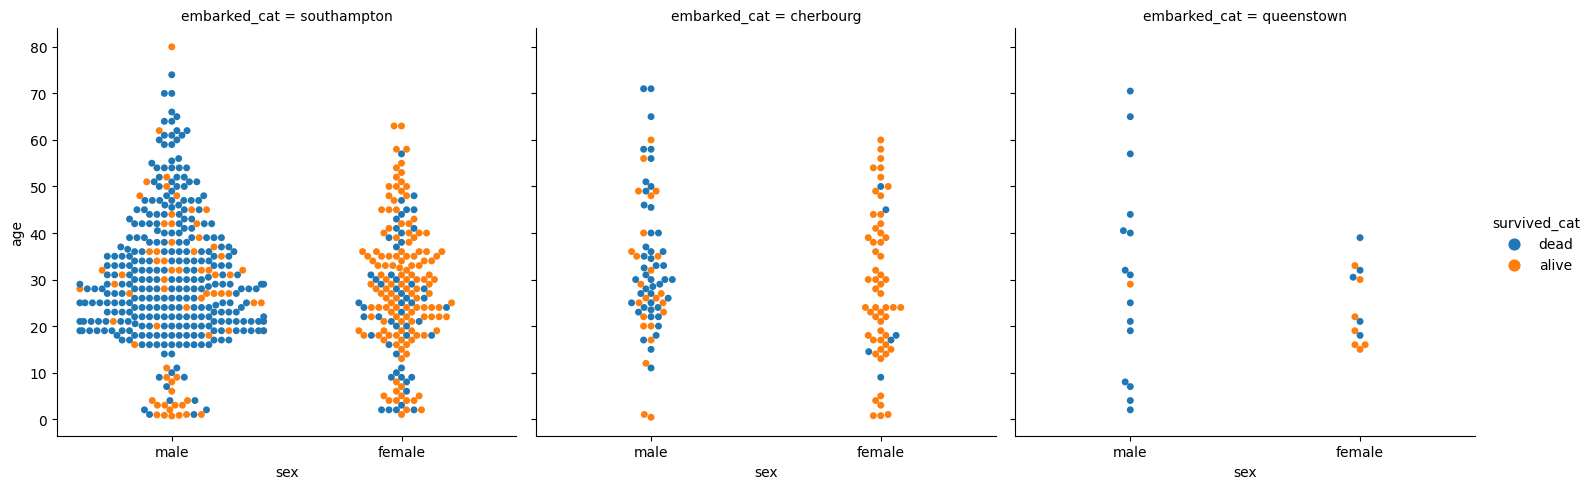

In [197]:
sns.catplot(data=train_data, kind = "swarm", x = "sex", y = "age", col= "embarked_cat", hue = "survived_cat")


In [198]:
south = train_data.loc[train_data.embarked_cat == "southampton"]["survived"]
cher = train_data.loc[train_data.embarked_cat == "cherbourg"]["survived"]
queen = train_data.loc[train_data.embarked_cat == "queenstown"]["survived"]


# south_percent = (sum(south) / len(south)) * 100
# cher_percent = (sum(cher)/ len(cher)) * 100
# queen_percent = (sum(queen)/ len(queen)) * 100

# print("percentage of south that survived is : ", round(south_percent, 2))
# print("percentage of cher that survived is: ", round(cher_percent, 2))
# print("percentage of queen that survived is: ", round(queen_percent, 2))

In [199]:
train_data.columns

Index(['id', 'survived', 'p_class', 'name', 'sex', 'age', 'sibling_spouse',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'num_relative',
       'survived_cat', 'embarked_cat', 'p_class_cat', 'num_relative_cat'],
      dtype='object')

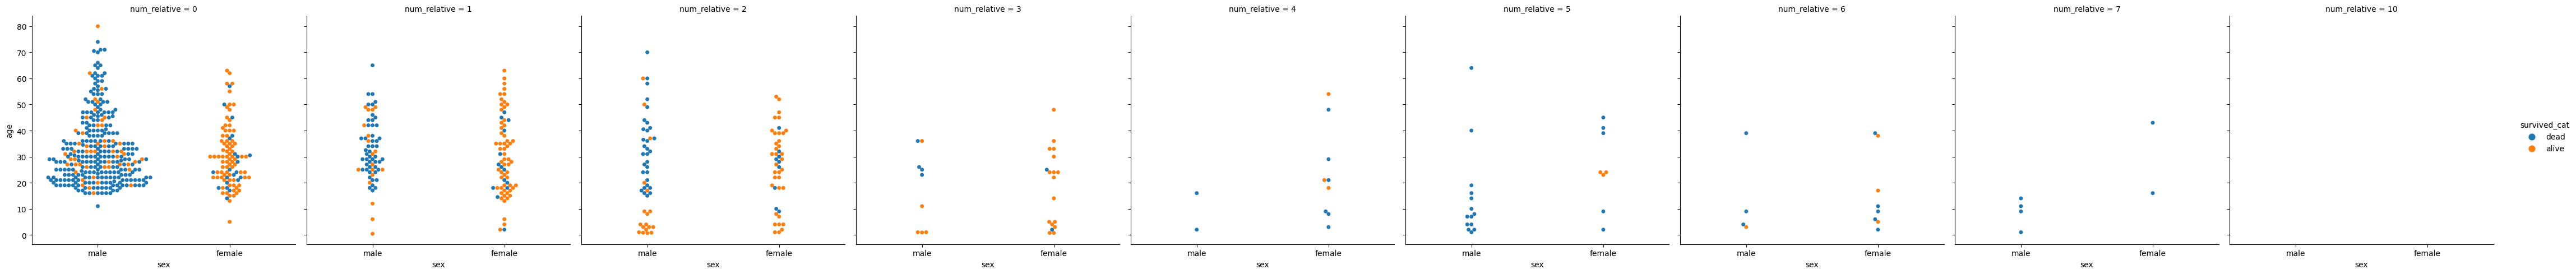

In [200]:
sns.catplot(data=train_data, kind = "swarm", x = "sex", y = "age", col= "num_relative", hue = "survived_cat")


In [201]:
train_data.columns

Index(['id', 'survived', 'p_class', 'name', 'sex', 'age', 'sibling_spouse',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'num_relative',
       'survived_cat', 'embarked_cat', 'p_class_cat', 'num_relative_cat'],
      dtype='object')

In [202]:
none = train_data[(train_data.num_relative == 0) & (train_data.sex == "female")]["survived"]
one = train_data[(train_data.num_relative == 1) & (train_data.sex == "female")]["survived"]
two = train_data[(train_data.num_relative == 2) & (train_data.sex == "female")]["survived"]
three = train_data[(train_data.num_relative == 3) & (train_data.sex == "female")]["survived"]
four = train_data[(train_data.num_relative == 4) & (train_data.sex == "female")]["survived"]


nonep = (sum(none) / len(none)) * 100
onep = (sum(one)/ len(one)) * 100
twop = (sum(two)/ len(two)) * 100
threep = (sum(three)/ len(three)) * 100
fourp = (sum(four)/ len(four)) * 100

print("percentage of 'none relative' that survived is : ", round(nonep, 2))
print("percentage of 'one relative' that survived is: ", round(onep, 2))
print("percentage of 'two relative' that survived is: ", round(twop, 2))
print("percentage of 'three relative' that survived is: ", round(threep, 2))
print("percentage of 'four relative' that survived is: ", round(fourp, 2))

percentage of 'none relative' that survived is :  78.57
percentage of 'one relative' that survived is:  81.61
percentage of 'two relative' that survived is:  77.55
percentage of 'three relative' that survived is:  84.21
percentage of 'four relative' that survived is:  25.0


Looking at the visual above, we discovered that only three death was recorded in first class, six for sercond class and the rest on third class. Also, there is a higher chance of survival in females between ages 27 and 46 in first class and ages between 3 and 23 in second class. 

Let therefore test if there is a relationship between ages and survival and also between survival and p_class.
Let us also check if there is an association between ages and survial and also between survival and p_class

In [203]:
correlation = train_data.corr()
check_corr = correlation["survived"].sort_values(ascending=True)
check_corr

p_class          -0.338481
age              -0.077221
sibling_spouse   -0.035322
id               -0.005007
num_relative      0.016639
parch             0.081629
fare              0.257307
survived          1.000000
Name: survived, dtype: float64

There is little or no correlation between ages and the number of survival and also between survival and p_class

<AxesSubplot:>

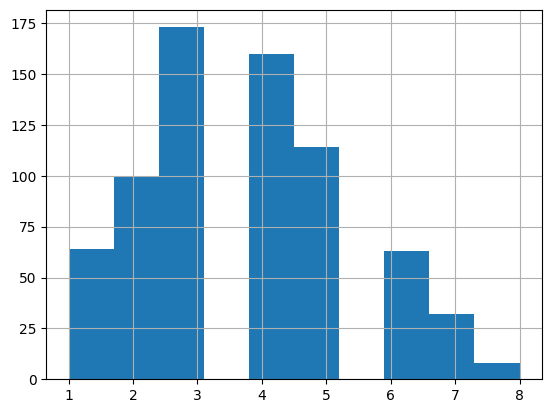

In [204]:
train_data["age_cat"] = pd.cut(train_data["age"],
                               bins = [0., 10, 19, 27, 35, 45, 55, 65, 80., np.inf],
                               labels = [1, 2, 3, 4, 5, 6, 7, 8, 9])
train_data["age_cat"].hist()

H0: There is no relationship between the survived and the sex variable

H1: There is a relationship between the survived and the sex variable (claim)

Next, We will conduct a statistical chi-squared test to establish whether there is a relationship between the sex and their survival

Dependent variable: survived

independent variable: sex


In [205]:
# contingency_sex = pd.crosstab(index=train_data["survived_cat"], columns = train_data["sex"], margins = True)
# contingency_sex

In [206]:
crosstab, test_results, expected = rp.crosstab(train_data["survived_cat"], train_data["sex"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

crosstab

sex               
sex          female   male     All
survived_cat                      
alive         26.15  12.23   38.38
dead           9.09  52.53   61.62
All           35.24  64.76  100.00

In [207]:
stat, p, dof, expected = chi2_contingency(crosstab)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

p value is 6.0957720296428576e-06
Dependent (reject H0)


From our test above, our p_value is less than 0.5. Since it is less than our threshold, we will reject our null hypothesis but before we reject our null hypothesis, let us check the assumptions. The assumptions are

1. The two samples are independent

2. No expected cell count is 0

3. No more than 20% of the cells have and expected cell count is less than 5. 

H0 : variables are dependent

H1 : variables are independent

In [208]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,263.0506
1,p-value =,0.0000
2,Cramer's phi =,0.5434


from the test above, our p-value is 0 and the cramer's phil is 0.5 tells us that the strength of the relationship is very strong which means that the relationship between the dependent and independent is very strong thus our first assumption holds true

In [209]:
expected

array([[ 13.525112,  24.854888,  38.38    ],
       [ 21.714888,  39.905112,  61.62    ],
       [ 35.24    ,  64.76    , 100.      ]])

from our test above, no expected cell count is 0 and also no more than 20% of the cells have and expected cell count is less than 5.

Decision: it can be seen that all the assumptions are met which indicates the statistical test result is reliable

...................................................................................................................................................................................................................................................................................................................................................................................................................................................

we will conduct a statistical chi-squared test to establish whether there is a relationship between the ages and their survival

Dependent variable: survived

independent variable: age


H0: There is no relationship between the survived and the age variable

H1: There is a relationship between the survived and the age variable (claim)

In [210]:
contingency = pd.crosstab(index=train_data["survived_cat"], columns = train_data["age_cat"], margins = True)
contingency

age_cat,1,2,3,4,5,6,7,8,All
survived_cat,,,,,,,,,
alive,38,41,62,66,45,26,11,1,290
dead,26,59,111,94,69,37,21,7,424
All,64,100,173,160,114,63,32,8,714


In [211]:
stat, p, dof, expected = chi2_contingency(contingency)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

p value is 0.5823840971439449
Independent (H0 holds true)


There is no relationship between age and survival.


From our test above, our p_value is greater than 0.5. Since it is greater than our threshold, we will fail to reject our null hypothesis.

Decision: There is no statistical significant relationship between the survived and their age.

Using age numeric

In [212]:
model = ols('survived ~ C(age)', data=train_data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(age),25.121868,87.0,1.228912,0.089048
Residual,147.091017,626.0,NaN,NaN


Still, there is no relationship between age and the number of persons that survived.

In [213]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)


,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(age),25.121868,87.0,0.288757,1.228912,0.089048,0.145877,0.027136
Residual,147.091017,626.0,0.234970,NaN,NaN,NaN,NaN


Assumption Test

In [214]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.8767227530479431, pvalue=2.4856369723902663e-23)

...................................................................................................................................................................................................................................................................................................................................................................................................................................................

Next, We will conduct a statistical chi-squared test to establish whether there is a relationship between the p_class and their survival

Dependent variable: survived

independent variable: p_class


H0: There is no relationship between the survived and the p_class variable

H1: There is a relationship between the survived and the p_class variable (claim)

In [215]:
contingency_pclass = pd.crosstab(index=train_data["survived_cat"], columns = train_data["p_class"], margins = True)
contingency_pclass

p_class,1,2,3,All
survived_cat,,,,
alive,136,87,119,342
dead,80,97,372,549
All,216,184,491,891


In [216]:
stat, p, dof, expected = chi2_contingency(contingency_pclass)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

p value is 6.258462423531468e-20
Dependent (reject H0)


There is a relationship between survival and p_class

From our test above, our p_value is less than 0.5. Since it is less than our threshold, we will reject our null hypothesis.

Decision: There is statistical significant relationship between the survived and their age.

..................................................................................................................................................................................................................................................................................................................................................................................................................................................

we will conduct a statistical chi-squared test to establish whether there is a relationship between the embarked and their survival

Dependent variable: survived

independent variable: embarked


H0: There is no relationship between the survived and the p_class variable

H1: There is a relationship between the survived and the p_class variable (claim)

In [217]:
contingency_embarked = pd.crosstab(index=train_data["survived_cat"], columns = train_data["embarked_cat"], margins = True)
contingency_embarked

embarked_cat,cherbourg,queenstown,southampton,All
survived_cat,,,,
alive,93,30,217,340
dead,75,47,427,549
All,168,77,644,889


In [218]:
stat, p, dof, expected = chi2_contingency(contingency_embarked)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

p value is 0.00018045058101554096
Dependent (reject H0)


From our test above, our p_value is less than 0.5. Since it is less than our threshold, we will reject our null hypothesis.

Decision: There is statistical significant relationship between the survived and embarked.

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................

we will conduct a statistical chi-squared test to establish whether there is a relationship between the num_relative and their survival

Dependent variable: survived

independent variable: num_relative


H0: There is no relationship between the survived and the num_relative variable

H1: There is a relationship between the survived and the num_relative variable (claim)

In [219]:
contingency_relative = pd.crosstab(index=train_data["survived_cat"], columns = train_data["num_relative_cat"], margins = True)
contingency_relative

num_relative_cat,alone,not alone,All
survived_cat,,,
alive,163,179,342
dead,374,175,549
All,537,354,891


In [220]:
stat, p, dof, expected = chi2_contingency(contingency_relative)

alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print("Dependent (reject H0)")
else:
    print("Independent (H0 holds true)")

p value is 1.9340079186274333e-07
Dependent (reject H0)


From our test above, our p_value is less than 0.5. Since it is less than our threshold, we will reject our null hypothesis.

Decision: There is statistical significant relationship between the survived and number of relatives.

From our tests above, we discovered that there is a statistical significance of relationship between survival and 
1. sex
2. point of origin
3. Number of relatives
4. p_class

Next, we will conduct a logistics regression. we want to test what the odd probability of our dependent variable ocurring as the values of our independent variables changes. Lets create a new dataframe.

In [221]:
train_data.columns

Index(['id', 'survived', 'p_class', 'name', 'sex', 'age', 'sibling_spouse',
       'parch', 'ticket', 'fare', 'cabin', 'embarked', 'num_relative',
       'survived_cat', 'embarked_cat', 'p_class_cat', 'num_relative_cat',
       'age_cat'],
      dtype='object')

In [222]:
log_regress_ind = pd.DataFrame(train_data[["sex", "embarked_cat", "num_relative_cat", "p_class"]])
depend_data = train_data["survived"]
log_regress_ind.head()

,sex,embarked_cat,num_relative_cat,p_class
0,male,southampton,not alone,3
1,female,cherbourg,not alone,1
2,female,southampton,alone,3
3,female,southampton,not alone,1
4,male,southampton,alone,3


Logistic regression using statsmodel

In [223]:
logit_model = smf.logit("survived ~ C(embarked_cat) + C(num_relative_cat) + p_class", data = train_data).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.585336
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Jun 2022   Pseudo R-squ.:                  0.1201
Time:                        13:28:11   Log-Likelihood:                -520.36
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 1.007e-29
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            1.4218      0.259      5.498      0.000       0.915       1.929
C(embarked_cat)[T.queenstown]        0.3246      0.310      1.047      0.295      -0.283       0.933
C(embarked_cat)[T.southampton]      -0.5411      0.194     -2.790      0.005      -0.921      -0.161
C(num_relative_cat)[T.not alone]     0.7756      0.152      5.089      0.000       0.477       1.074
p_class                             -0.8260      0.094     -8.785      0.000      -1.010      -0.642
====================================================================================================
"""

In [224]:
model_odds = pd.DataFrame(np.exp(logit_model.params), columns= ['OR'])
model_odds['z-value']= logit_model.pvalues
model_odds[['2.5%', '97.5%']] = np.exp(logit_model.conf_int())

model_odds

,OR,z-value,2.5%,97.5%
Intercept,4.144636,3.836758e-08,2.496715,6.880244
C(embarked_cat)[T.queenstown],1.383538,2.953138e-01,0.753254,2.541214
C(embarked_cat)[T.southampton],0.582085,5.278000e-03,0.397982,0.851351
C(num_relative_cat)[T.not alone],2.171925,3.594209e-07,1.611093,2.927987
p_class,0.437785,1.569945e-18,0.364100,0.526382


Assumption check on the logistic regression

c:\Users\Elearning Institute\titanic\titanic_regression\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


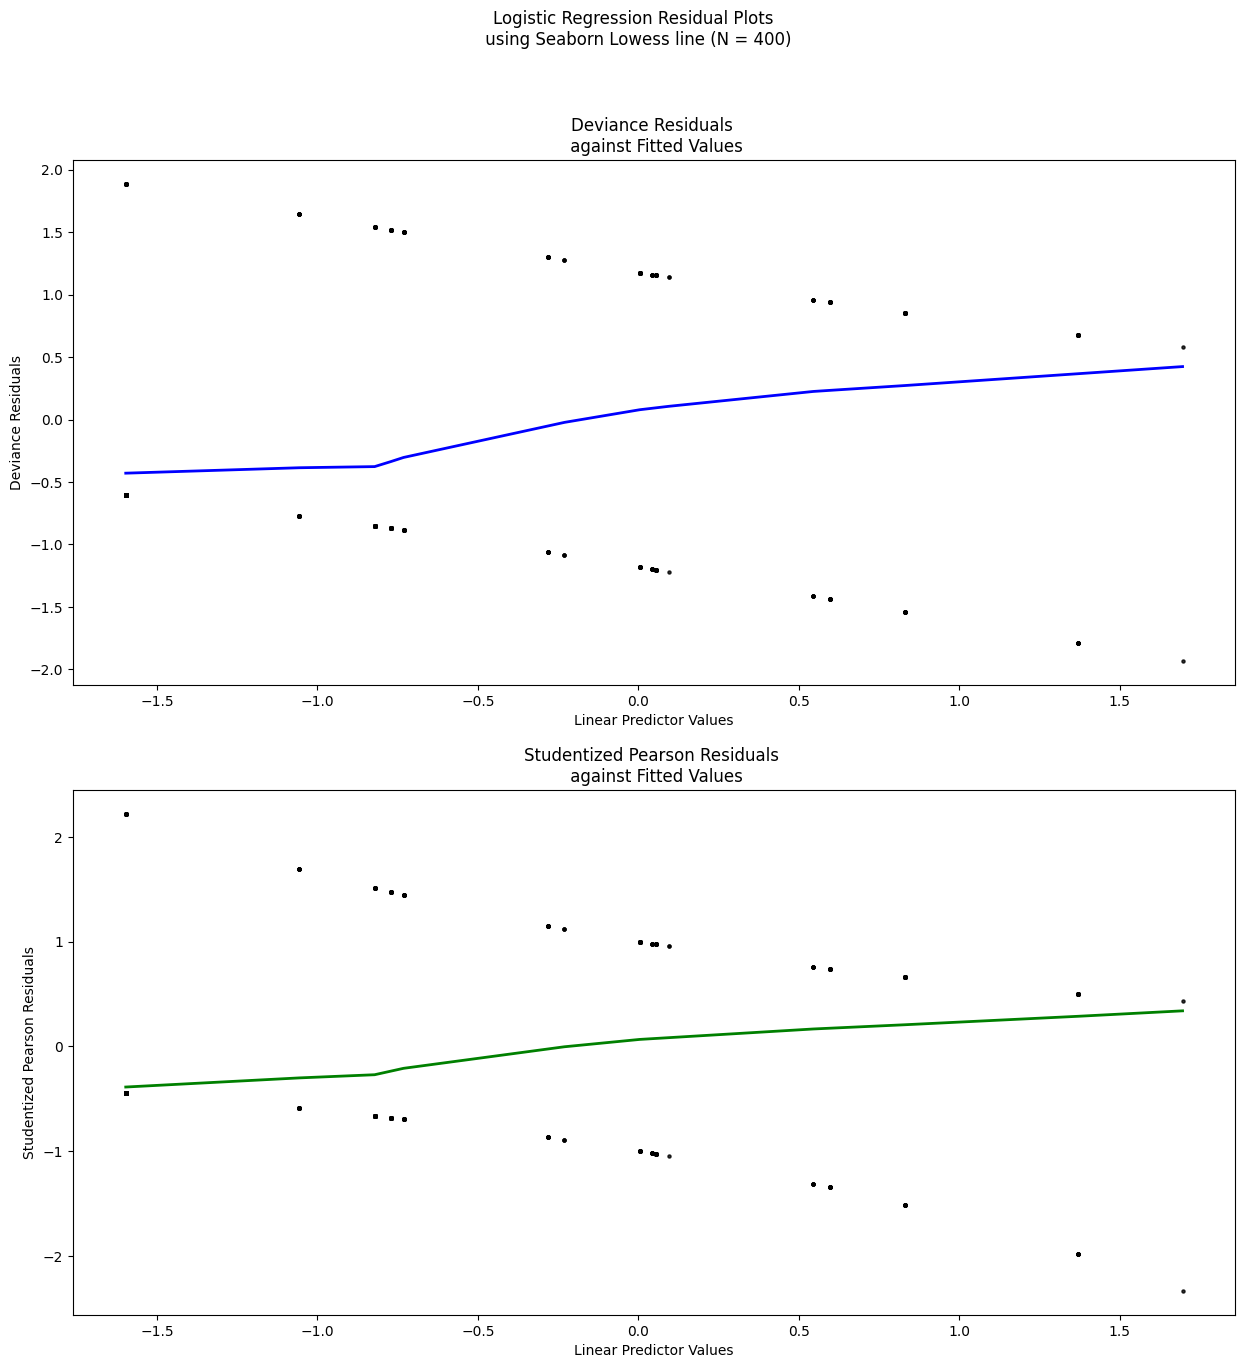

In [225]:
## Plotting multiple plots same figure
fig, (axL, axR) = plt.subplots(2, figsize=(15, 15))
plt.suptitle("Logistic Regression Residual Plots \n using Seaborn Lowess line (N = 400)")


# Deviance Residuals
sns.regplot(logit_model.fittedvalues, logit_model.resid_dev, ax= axL,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"b", "alpha":1, "lw":2}, lowess=True)

axL.set_title("Deviance Residuals \n against Fitted Values")
axL.set_xlabel("Linear Predictor Values")
axL.set_ylabel("Deviance Residuals")

# Studentized Pearson Residuals
sns.regplot(logit_model.fittedvalues, logit_model.resid_pearson, ax= axR,
            color="black", scatter_kws={"s": 5},
            line_kws={"color":"g", "alpha":1, "lw":2}, lowess=True)

axR.set_title("Studentized Pearson Residuals \n against Fitted Values")
axR.set_xlabel("Linear Predictor Values")
axR.set_ylabel("Studentized Pearson Residuals")

plt.show()
